<a href="https://colab.research.google.com/github/GuilhermeOrtega/GuilhermeOrtega/blob/main/exemplos_analise_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução Análise de Texto

## Módulos

- Instalações

In [4]:
! sudo pip install unidecode #Instalaççao do unicode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


- Carregamento

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud #criar nuvem de palavras
from PIL import Image #carregar imagens

In [5]:
import re #comando regex
from unicodedata import normalize #decodificação
import unidecode #decodificação
import string # funções para texto

In [6]:
from spacy.lang.pt.stop_words import STOP_WORDS #buscar stopwords

In [9]:
STOP_WORDS

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

## Carregar dados

In [7]:
dados_cptm = pd.read_csv('dados_cptm.csv', encoding = 'latin1')

In [8]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28
...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17


from matplotlib import pyplot as plt
dados_cptm['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dados_cptm['polaridade'].plot(kind='hist', bins=20, title='polaridade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dados_cptm.plot(kind='scatter', x='id', y='polaridade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dados_cptm['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dados_cptm['polaridade'].plot(kind='line', figsize=(8, 4), title='polaridade')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
dados_cptm.dtypes

,0
created,object
id,int64
texto_do_twitter,object
screenName,object
polaridade,int64
data_ajustada,object


## Pré-processamento

### Funções importantes

In [11]:
# retirar url's
url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?') #Função para filtrar dados de url no texto

In [12]:
# pontuacao
punc_re = re.compile('[%s]' % re.escape(string.punctuation)) #Retirar todas as pontuações

In [13]:
# numeros
num_re = re.compile('(\\d+)') #Retirar números

In [14]:
# alfa numericos
alpha_num_re = re.compile("^[a-z0-9_.]+$") # Retirar alfa númericos

In [15]:
# mencoes
mention_re = re.compile('@(\w+)')

### Ajustes

- Deixar minúsculo

In [16]:
texto_ajustado = dados_cptm['texto_do_twitter'].apply(lambda x: x.lower())
texto_ajustado

,texto_do_twitter
0,@cptm_oficial 20 min q estou esperando um trem...
1,[18h20] cptm: linha 11 - coral: velocidade red...
2,[18h20] cptm: linha 9 - esmeralda: operação no...
3,[18h20] cptm: linha 7 - rubi: velocidade reduz...
4,@_lcoliveira2016 @usuariosmetrosp @cptm_oficia...
...,...
8465,[10h59] cptm: linha 9 - esmeralda: operação no...
8466,[10h59] cptm: linha 7 - rubi: velocidade reduz...
8467,[10h39] cptm: linha 11 - coral: operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar url's

In [17]:
texto_ajustado[texto_ajustado.str.contains('http')]

,texto_do_twitter
9,18h - obras alteram circulação dos trens duran...
10,18h - obras alteram circulação dos trens duran...
11,18h - obras alteram circulação dos trens duran...
12,18h - obras alteram circulação dos trens duran...
13,18h - obras alteram circulação dos trens duran...
...,...
8447,problemas nas linhas de trens e metro. saiba c...
8454,rt @cptm_oficial: #dicacultural olhares sobre ...
8457,#dicacultural olhares sobre os trilhos\n\n#vej...
8463,vontadinha de bater cabelo na cptm https://t.c...


In [18]:
texto_ajustado[texto_ajustado.str.contains('http')].apply(lambda x: url_re.sub(' ', x))

,texto_do_twitter
9,18h - obras alteram circulação dos trens duran...
10,18h - obras alteram circulação dos trens duran...
11,18h - obras alteram circulação dos trens duran...
12,18h - obras alteram circulação dos trens duran...
13,18h - obras alteram circulação dos trens duran...
...,...
8447,problemas nas linhas de trens e metro. saiba c...
8454,rt @cptm_oficial: #dicacultural olhares sobre ...
8457,#dicacultural olhares sobre os trilhos\n\n#vej...
8463,vontadinha de bater cabelo na cptm


In [19]:
texto_ajustado = texto_ajustado.apply(lambda x: url_re.sub(' ', x))

- Ajustar menções com @

In [20]:
texto_ajustado = texto_ajustado.apply(lambda x: mention_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,20 min q estou esperando um trem pra luz na ...
1,[18h20] cptm: linha 11 - coral: velocidade red...
2,[18h20] cptm: linha 9 - esmeralda: operação no...
3,[18h20] cptm: linha 7 - rubi: velocidade reduz...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,[10h59] cptm: linha 9 - esmeralda: operação no...
8466,[10h59] cptm: linha 7 - rubi: velocidade reduz...
8467,[10h39] cptm: linha 11 - coral: operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Ajustar pontuações (*punctuations marks*)

In [21]:
texto_ajustado = texto_ajustado.apply(lambda x: punc_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,20 min q estou esperando um trem pra luz na ...
1,18h20 cptm linha 11 coral velocidade red...
2,18h20 cptm linha 9 esmeralda operação no...
3,18h20 cptm linha 7 rubi velocidade reduz...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,10h59 cptm linha 9 esmeralda operação no...
8466,10h59 cptm linha 7 rubi velocidade reduz...
8467,10h39 cptm linha 11 coral operação norma...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar numeração

In [22]:
texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub(' ', x))
texto_ajustado

,texto_do_twitter
0,min q estou esperando um trem pra luz na b...
1,h cptm linha coral velocidade reduzi...
2,h cptm linha esmeralda operação norm...
3,h cptm linha rubi velocidade reduzid...
4,durante a semana eles ñ reprimem o comér...
...,...
8465,h cptm linha esmeralda operação norm...
8466,h cptm linha rubi velocidade reduzid...
8467,h cptm linha coral operação normal ...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Ajustar acentos

In [23]:
texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
texto_ajustado

,texto_do_twitter
0,min q estou esperando um trem pra luz na b...
1,h cptm linha coral velocidade reduzi...
2,h cptm linha esmeralda operacao norm...
3,h cptm linha rubi velocidade reduzid...
4,durante a semana eles n reprimem o comer...
...,...
8465,h cptm linha esmeralda operacao norm...
8466,h cptm linha rubi velocidade reduzid...
8467,h cptm linha coral operacao normal ...
8468,ao embarcar ou desembarcar na cptm tenha muito...


- Limpar textos alfa numericos e palavras menores que 3 caracteres

In [24]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [25]:
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))
texto_ajustado

,texto_do_twitter
0,estou esperando trem nada absurdo
1,cptm linha coral velocidade reduzida linha s...
2,cptm linha esmeralda operacao normal linha t...
3,cptm linha rubi velocidade reduzida linha di...
4,durante semana eles reprimem comercio irreg...
...,...
8465,cptm linha esmeralda operacao normal linha t...
8466,cptm linha rubi velocidade reduzida linha di...
8467,cptm linha coral operacao normal linha safir...
8468,embarcar desembarcar cptm tenha muito cuid...


- Ajustar palavras muito usadas (*stopwords*)

In [26]:
def remove_stops(texto):
    # expects a string
    stops = set(STOP_WORDS)
    list_pos = 0
    cleaned_str = ''
    text = texto.split()
    for word in text:
        if word not in stops:
            # rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [27]:
list(STOP_WORDS)[0:15]

['eventual',
 'algo',
 'pelo',
 'doze',
 'zero',
 'tentaram',
 'bastante',
 'quem',
 'nada',
 'quieto',
 'assim',
 'além',
 'do',
 'isso',
 'conselho']

In [28]:
#STOP_WORDS.update({'cptm'})

In [29]:
texto_ajustado = texto_ajustado.apply(lambda x: remove_stops(x))
texto_ajustado

,texto_do_twitter
0,esperando trem absurdo
1,cptm linha coral velocidade reduzida linha saf...
2,cptm linha esmeralda operacao normal linha tur...
3,cptm linha rubi velocidade reduzida linha diam...
4,durante semana reprimem comercio irregular que...
...,...
8465,cptm linha esmeralda operacao normal linha tur...
8466,cptm linha rubi velocidade reduzida linha diam...
8467,cptm linha coral operacao normal linha safira ...
8468,embarcar desembarcar cptm tenha cuidado altura...


- Gravar as mudanças no dataframe

In [30]:
dados_cptm['texto_twitter_ajustado'] = texto_ajustado

In [31]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada,texto_twitter_ajustado
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28,esperando trem absurdo
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28,cptm linha coral velocidade reduzida linha saf...
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28,cptm linha esmeralda operacao normal linha tur...
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28,cptm linha rubi velocidade reduzida linha diam...
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28,durante semana reprimem comercio irregular que...
...,...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17,cptm linha esmeralda operacao normal linha tur...
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17,cptm linha rubi velocidade reduzida linha diam...
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17,cptm linha coral operacao normal linha safira ...
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17,embarcar desembarcar cptm tenha cuidado altura...


## Nuvem de palavras

Fonte: https://amueller.github.io/word_cloud/index.html

In [ ]:
# combinar as linhas em texto inteiro
texto_completo = " ".join(s for s in dados_cptm['texto_twitter_ajustado'])
texto_completo

'esperando trem absurdo cptm linha coral velocidade reduzida linha safira velocidade reduzida transitosp cptm linha esmeralda operacao normal linha turquesa operacao normal transitosp cptm linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp durante semana reprimem comercio irregular queria fizessem feriado cptm nota cptm linha coral velocidade reduzida linha safira velocidade reduzida transitosp cptm linha esmeralda operacao normal linha turquesa operacao normal transitosp cptm linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm no

- Nuvem simples

In [ ]:
wc = WordCloud()
#wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

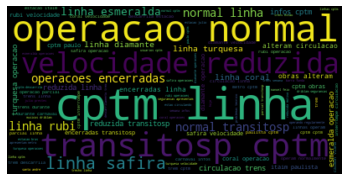

In [ ]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plot_path = 'cptm_wordcloud.png'
#plt.savefig(plot_path,  bbox_inches='tight', dpi = 100)

- Nuvem com formato

In [ ]:
trem_formato = np.array(Image.open('trem.png'))

(-0.5, 715.5, 361.5, -0.5)

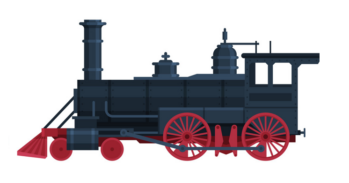

In [ ]:
plt.figure()
plt.imshow(trem_formato, interpolation='bilinear')
plt.axis("off")

In [ ]:
wc = WordCloud(background_color='white', mask=trem_formato)

In [ ]:
wc.generate(texto_completo)

In [ ]:
wc.to_file("trem.png")

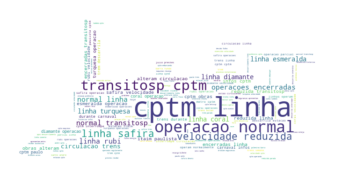

In [ ]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plot_path = 'trem_cptm_wordcloud.png'
plt.savefig(plot_path,  bbox_inches='tight', dpi = 300)